In [1]:
# only adjust settings in this cell
state = 'WV' 
year = 2020
enumeration_limit = 10

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of WV has 2 districts.


In [5]:
from optimization import generate_plans_with_refinement

plans, first_feasible_dev = generate_plans_with_refinement(G, ideal_population, state, year, enumeration_limit)


*****************************************
Trying deviation = 0.5.
*****************************************
Set parameter Username
Academic license - for non-commercial use only - expires 2026-04-01
Total time = 146.12

*****************************************
Trying deviation = 1.0.
*****************************************
Total time = 39.06

*****************************************
Trying deviation = 2.0.
*****************************************
Total time = 29.72

*****************************************
Trying deviation = 4.0.
*****************************************
Total time = 15.18

*****************************************
Trying deviation = 8.0.
*****************************************
Total time = 7.68

*****************************************
Trying deviation = 16.0.
*****************************************
Total time = 6.0

*****************************************
Trying deviation = 32.0.
*****************************************
Total time = 3.16

*************

In [6]:
no_solution_region = [0, first_feasible_dev] if first_feasible_dev > 0.5 else None
print(f"No feasible solution was found within the region: {no_solution_region}")

No feasible solution was found within the region: None


***************************************
obj_type = cut_edges
***************************************
Pareto front objective values: [[0.0, 23], [2.0, 20], [13.0, 18], [38.0, 14], [224.0, 13], [2376.0, 12]]


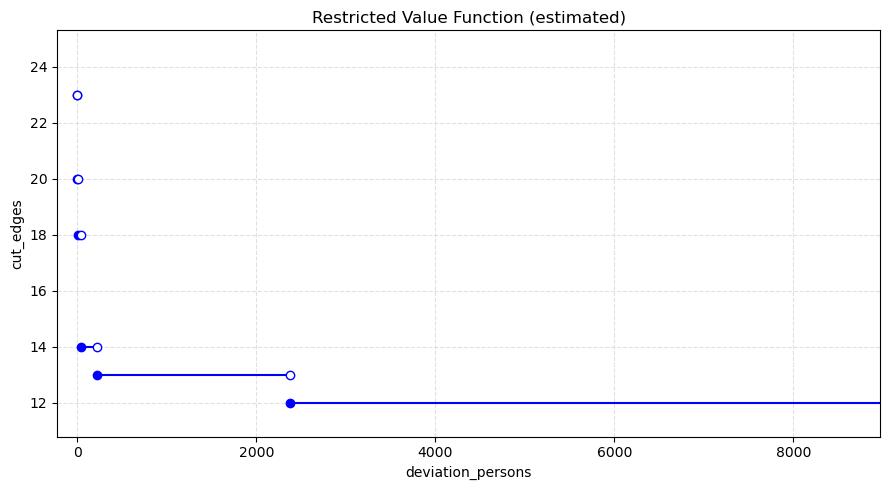

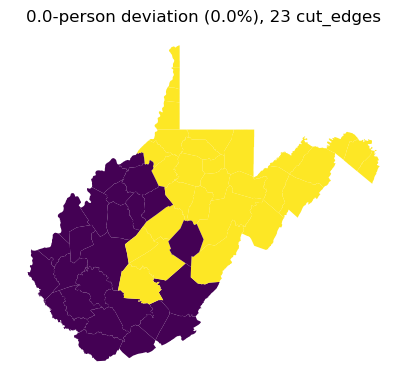

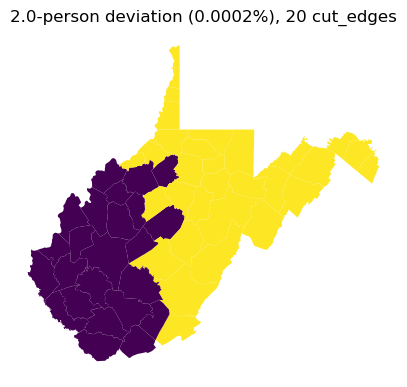

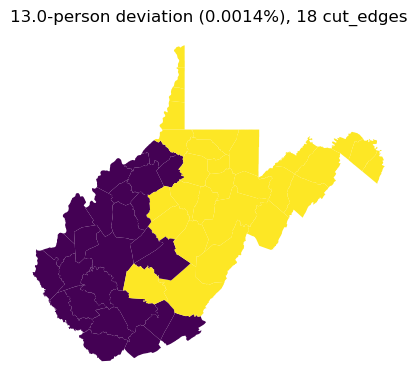

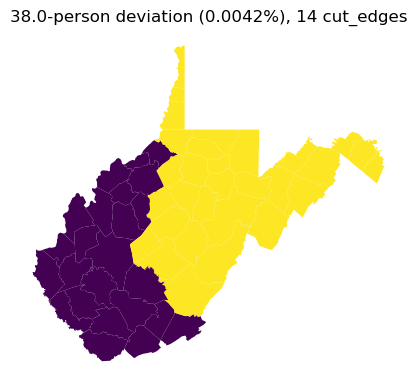

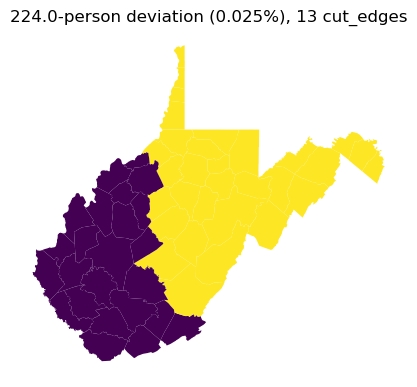

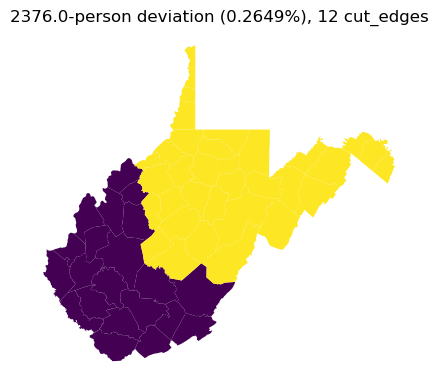

***************************************
obj_type = perimeter
***************************************
Pareto front objective values: [[0.0, 33.054420698849164], [1.0, 32.61160689781307], [10.0, 31.458044448764163], [38.0, 29.005716921206407], [224.0, 28.95506543354757], [867.0, 28.345121895965345], [1510.0, 28.030353505645266], [2230.0, 27.780077795957006], [2964.0, 27.59596830143478]]


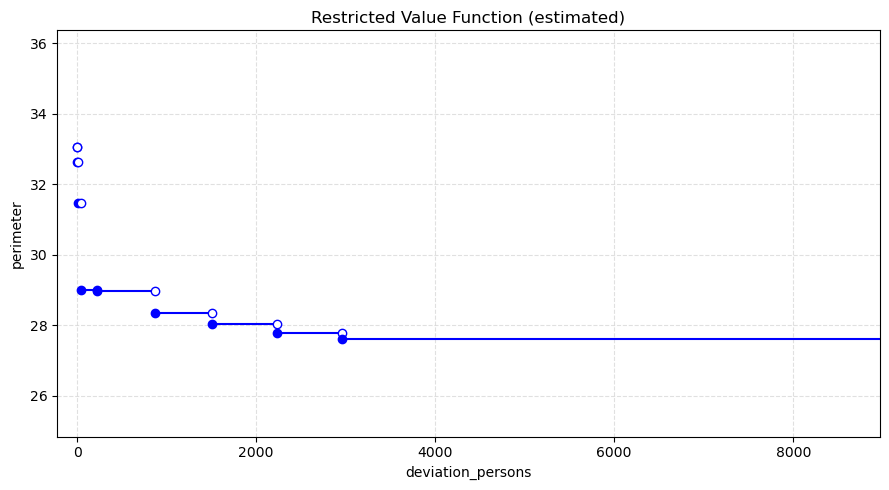

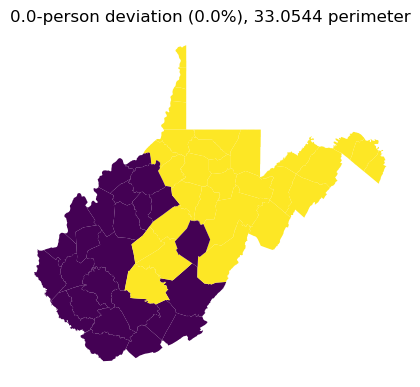

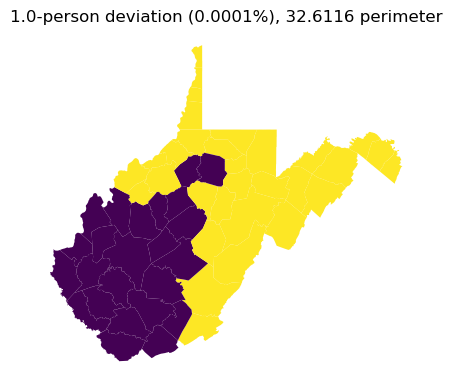

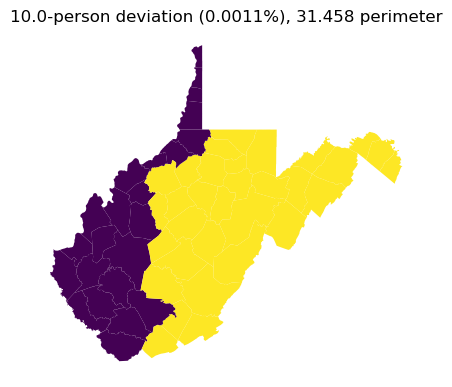

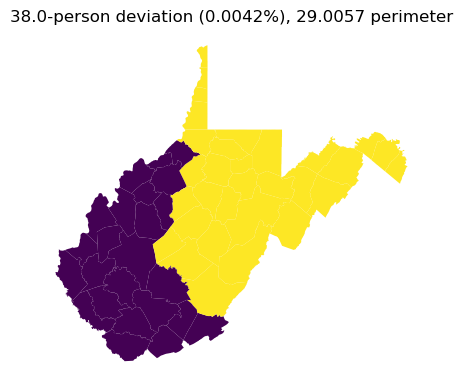

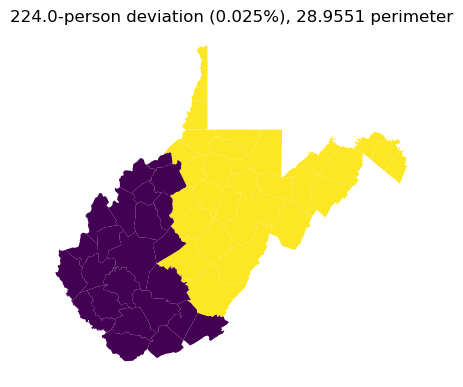

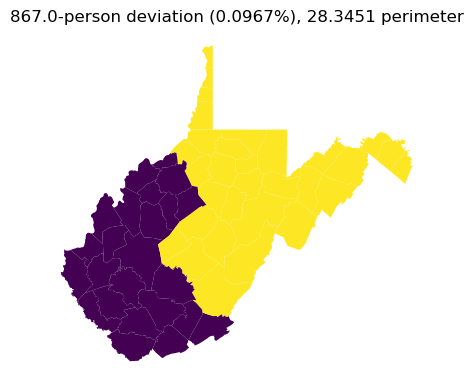

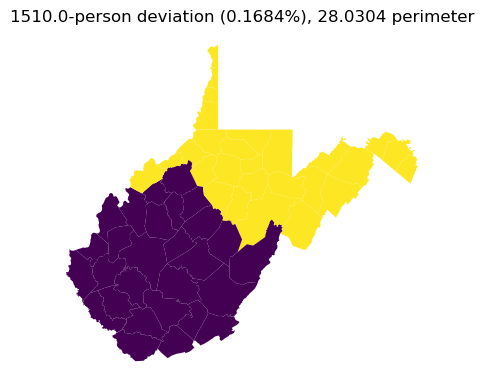

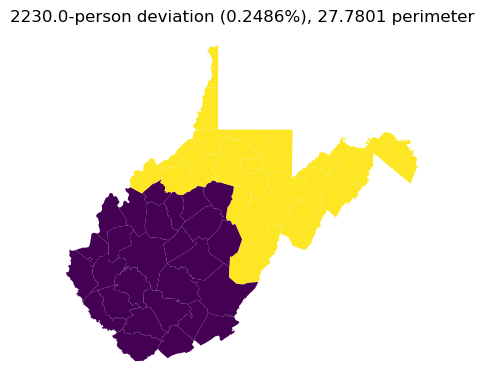

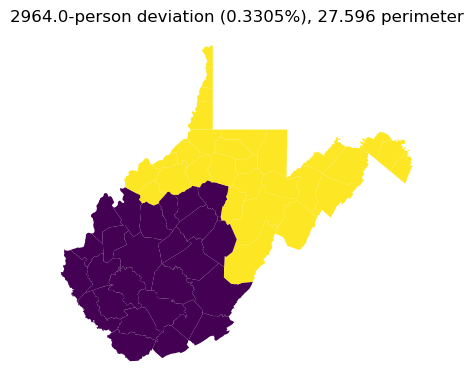

***************************************
obj_type = inverse_Polsby_Popper
***************************************
Pareto front objective values: [[0.0, 6.954907275809182], [10.0, 6.509394192154758], [21.0, 6.407021468906455], [38.0, 5.336530390967631], [224.0, 5.327541455742598], [867.0, 5.107219648164346], [2376.0, 4.950221051217513], [7758.0, 4.911562068117615]]


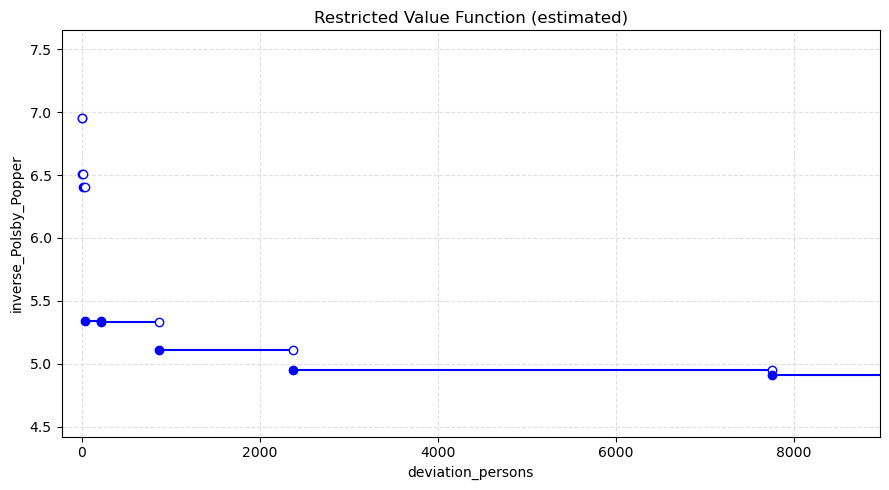

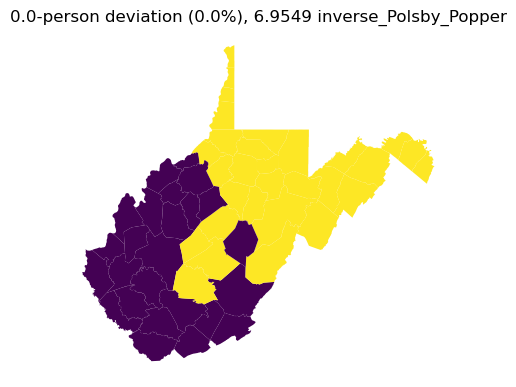

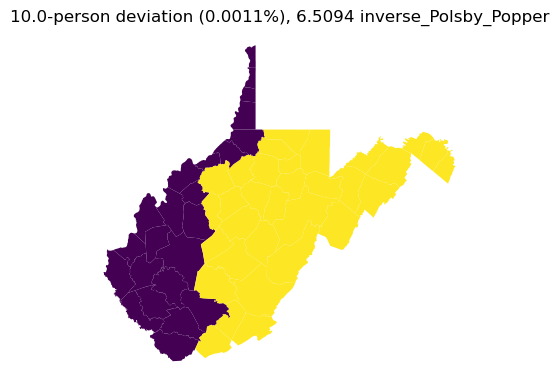

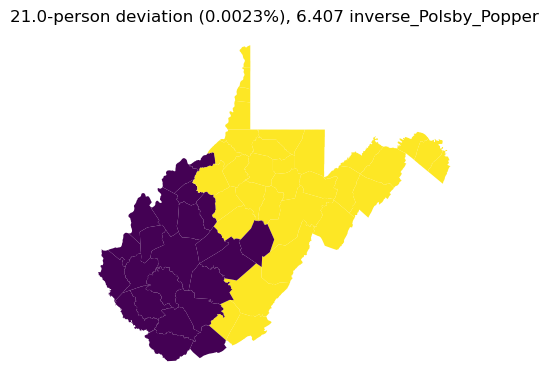

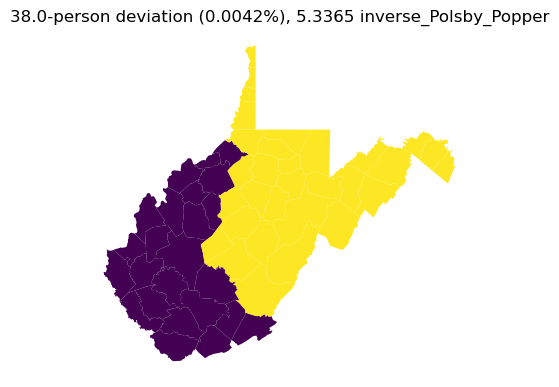

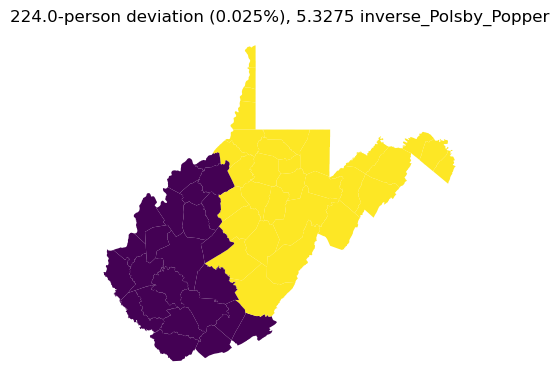

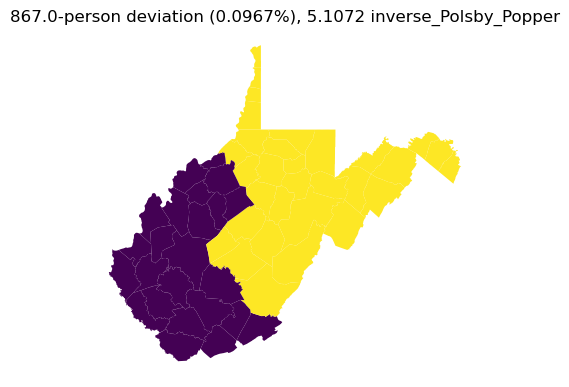

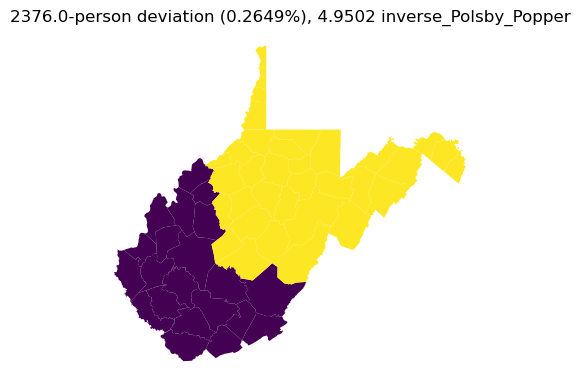

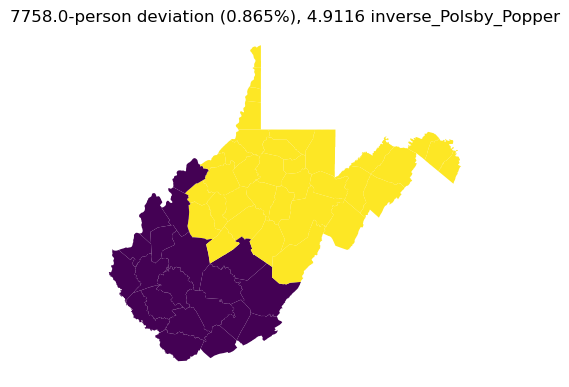

***************************************
obj_type = average_Polsby_Popper
***************************************
Pareto front objective values: [[0.0, 0.14821158573606164], [1.0, 0.17844855793606945], [14.0, 0.1810138015890068], [38.0, 0.19354189168687813], [45.0, 0.20024790313152843], [398.0, 0.20851288202041202], [1510.0, 0.22144907665114788], [2230.0, 0.23758746312472134], [2964.0, 0.23947554189700343]]


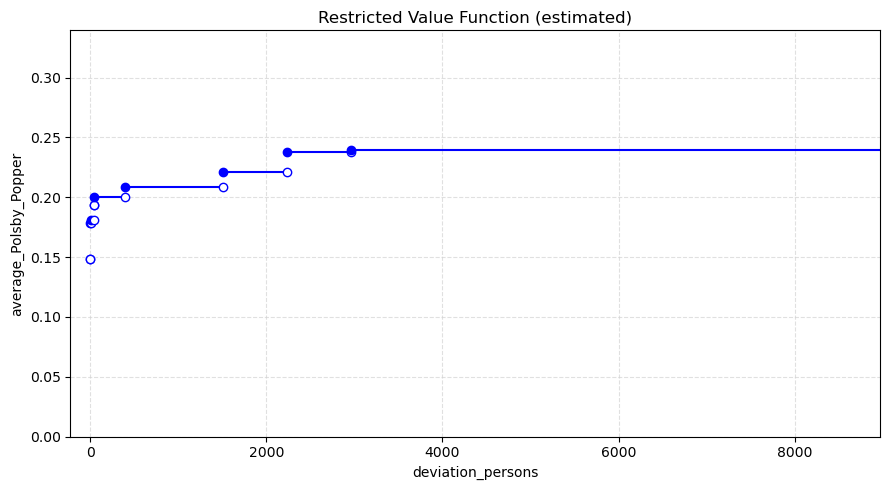

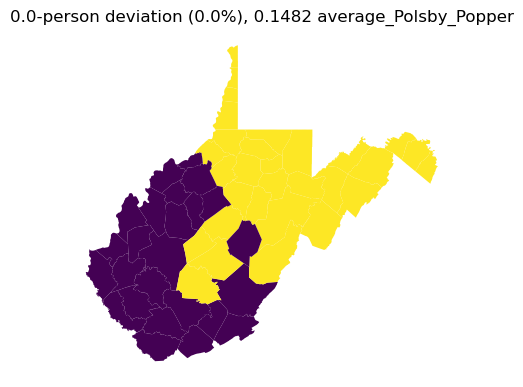

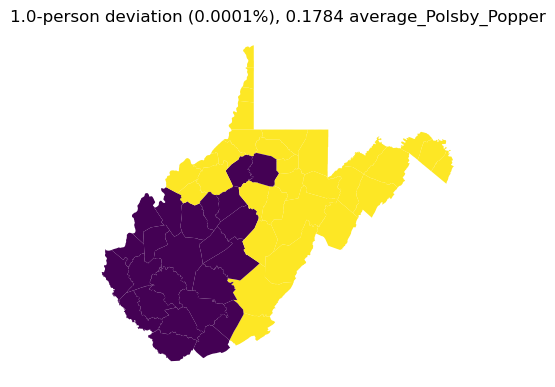

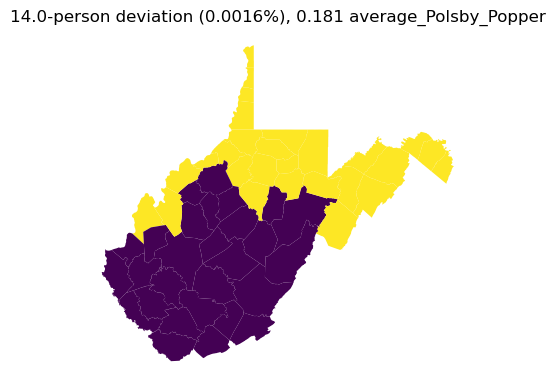

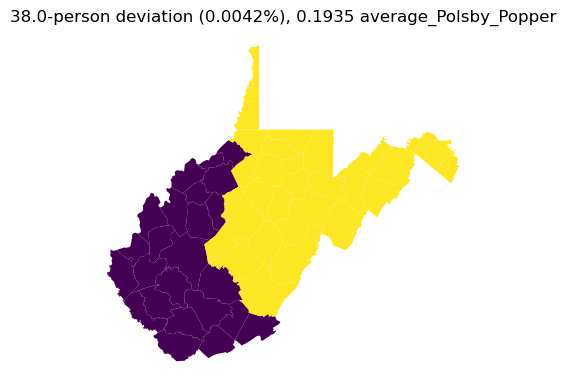

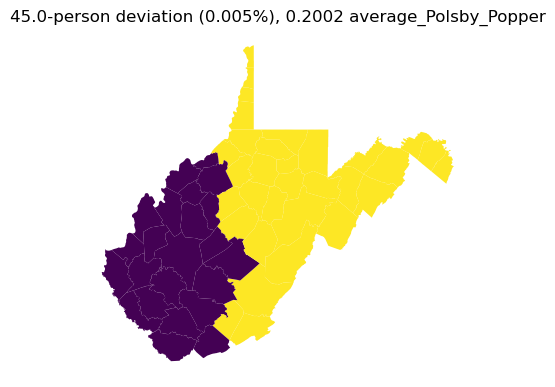

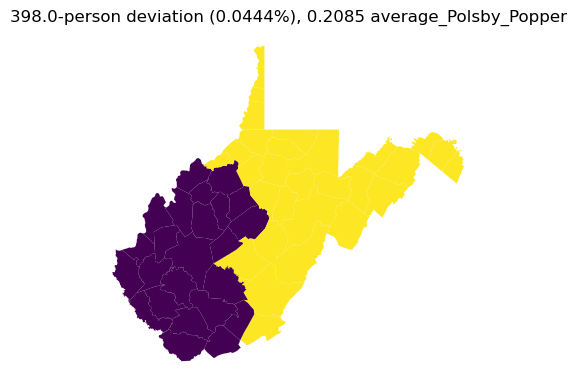

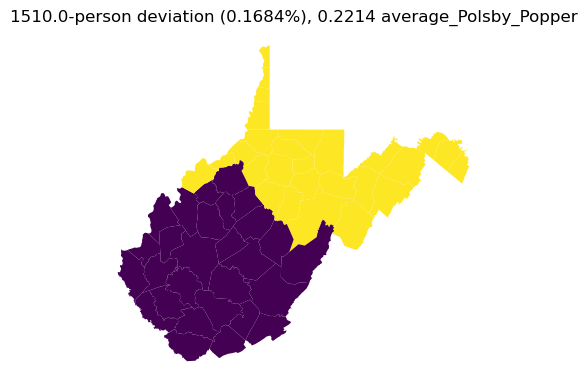

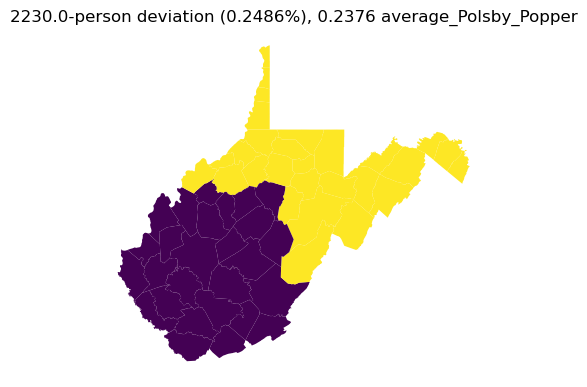

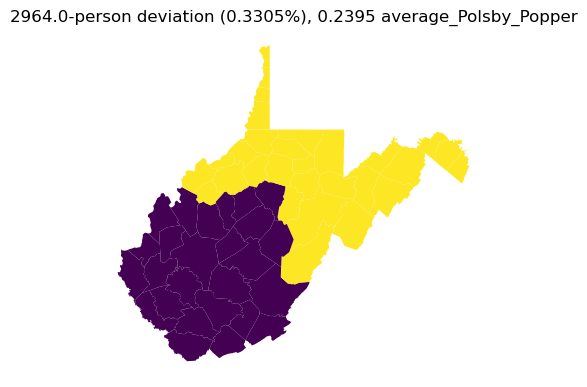

***************************************
obj_type = bottleneck_Polsby_Popper
***************************************
Pareto front objective values: [[0.0, 0.12259297907306219], [3.0, 0.12658105021026547], [10.0, 0.13776758559512225], [38.0, 0.15902958146946897], [867.0, 0.15996011746188368], [880.0, 0.16601706886261902], [1324.0, 0.17175069940564822], [2376.0, 0.17380830162742314], [7758.0, 0.17579521695507364]]


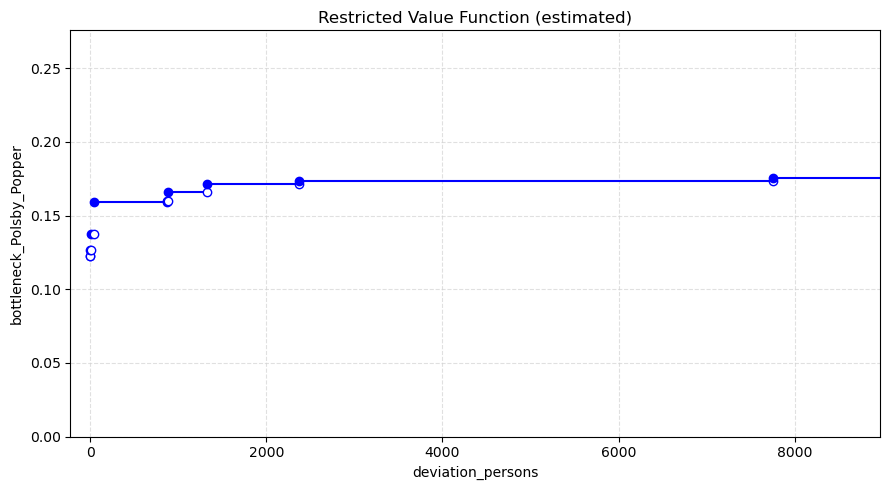

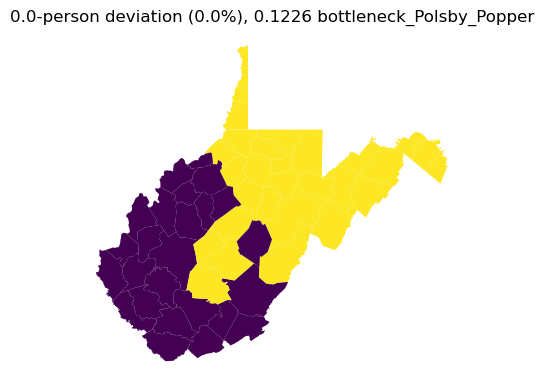

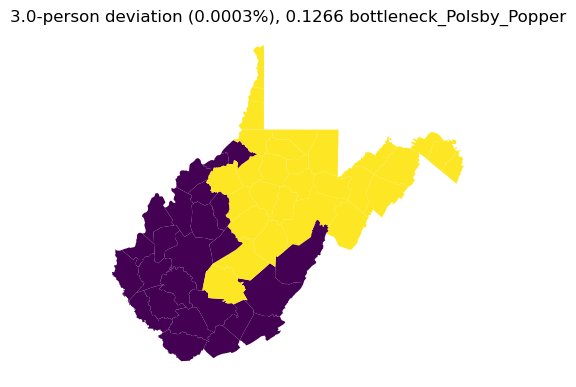

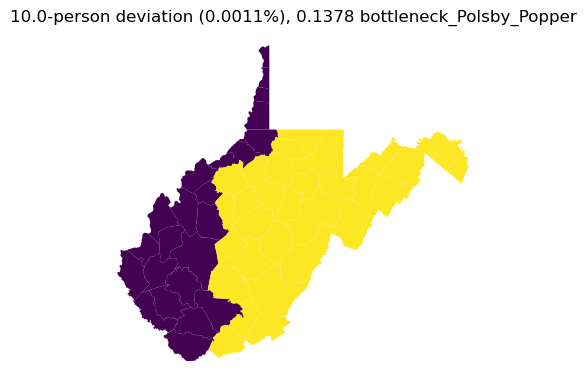

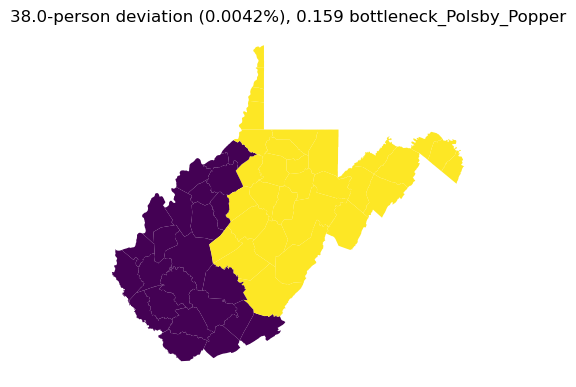

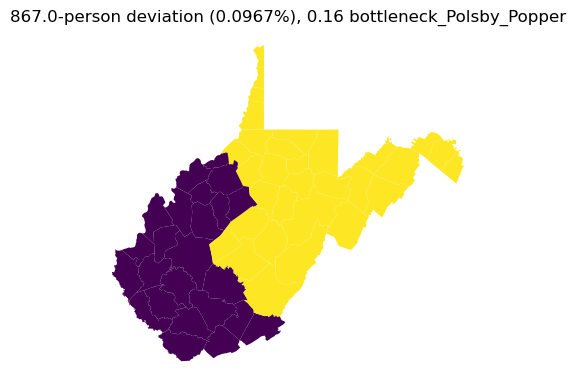

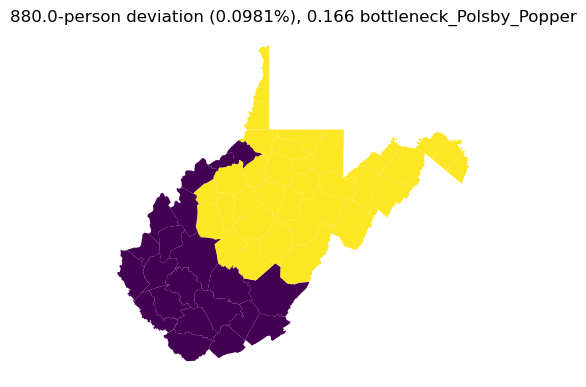

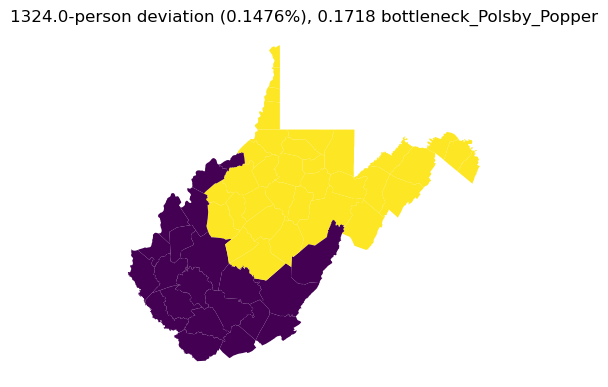

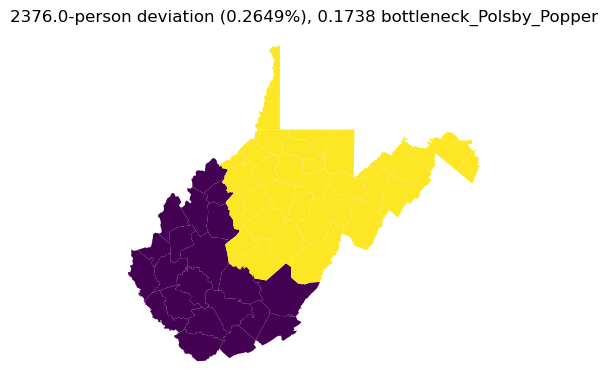

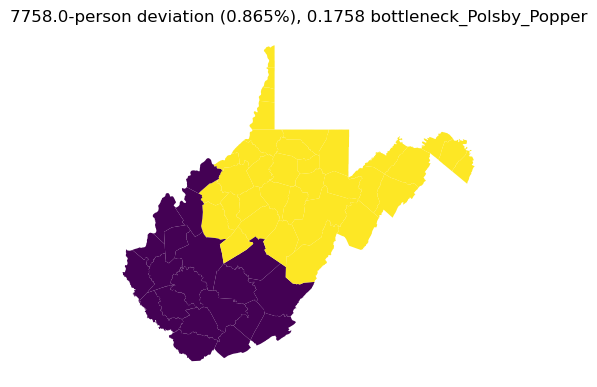

In [7]:
from pareto import plot_pareto_frontiers

obj_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']

pareto_plans = plot_pareto_frontiers(
                G,
                method='heuristic',
                plans=plans,                                   #if method ='epsilon_constraint_method' is None 
                obj_types=obj_types,                           #if method ='epsilon_constraint_method' is obj_type
                ideal_population=ideal_population,
                state=state,
                filepath=filepath,
                filename2=filename2,
                no_solution_region=no_solution_region,
                year=year,
                result=None,                                   #if method ='heuristic' is None 
             )

In [8]:
len(plans)

160

In [9]:
for obj_type in obj_types:
    print("***************************************")
    print("obj_type =", obj_type)
    print("***************************************")
    print("Pareto front plans:", pareto_plans[obj_type])

***************************************
obj_type = cut_edges
***************************************
Pareto front plans: [[[0, 2, 4, 6, 8, 9, 13, 17, 19, 20, 22, 23, 26, 28, 29, 31, 33, 34, 36, 42, 43, 45, 50, 51, 54], [1, 3, 5, 7, 10, 11, 12, 14, 15, 16, 18, 21, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 44, 46, 47, 48, 49, 52, 53]], [[0, 1, 2, 5, 6, 9, 13, 17, 19, 22, 23, 26, 28, 29, 31, 33, 34, 36, 42, 45, 49, 50, 52, 54], [3, 4, 7, 8, 10, 11, 12, 14, 15, 16, 18, 20, 21, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 51, 53]], [[0, 2, 4, 5, 6, 7, 9, 13, 17, 18, 19, 22, 23, 26, 28, 29, 31, 33, 34, 36, 42, 45, 49, 50, 51, 54], [1, 3, 8, 10, 11, 12, 14, 15, 16, 20, 21, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 52, 53]], [[0, 2, 4, 6, 7, 9, 13, 17, 19, 22, 23, 26, 28, 29, 31, 33, 34, 36, 42, 45, 50, 51, 52, 54], [1, 3, 5, 8, 10, 11, 12, 14, 15, 16, 18, 20, 21, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 53]], [[0, 2, 4, 6, 